In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None

iris_data = pd.read_csv('iris_dataset_missing.csv')

## Q1
### CM1. Pairs Plot

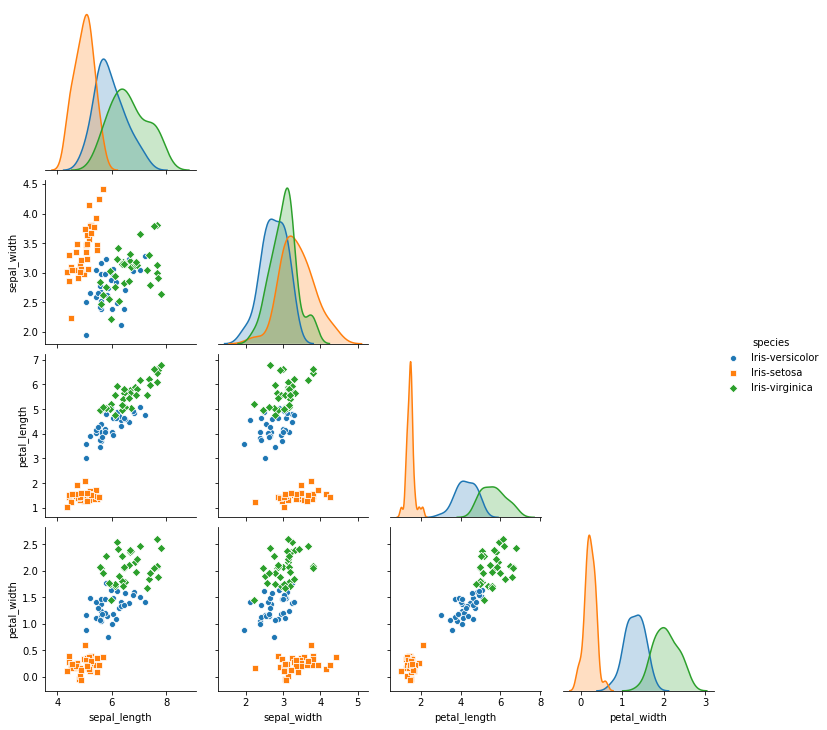

In [4]:
import seaborn as sns
sns.pairplot(iris_data, corner = True, hue = "species", markers=["o", "s", "D"])

### CM2. Correlation, Mean, Var, Skew, Kurt

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Correlation

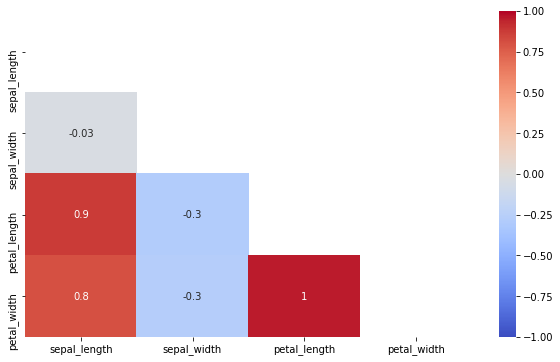

In [7]:
matrix = np.triu(iris_data.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(iris_data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', mask=matrix)

In [5]:
print(iris_data.corr().round(2))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.03          0.88         0.81
sepal_width          -0.03         1.00         -0.29        -0.27
petal_length          0.88        -0.29          1.00         0.96
petal_width           0.81        -0.27          0.96         1.00


sepal_length and petal_width; sepal_length and petal_length; petal_length and petal_width are correlated at a large effect.

sepal_width and petal_width; sepal_width and petal_length are correlated at a medium effect.

sepal_length and sepal_width correlated at a small effect.

Matching people's common sense, petal_length and petal_width are nearly completely related (corr = 0.96). However, sepal_width and sepal_length have such a slight relationship, to many people's surprise.

#### Mean, Var, Skew, Kurt

In [6]:
stats = iris_data.describe()
stats.loc['var'] = iris_data.var().tolist()
stats.loc['skew'] = iris_data.skew().tolist()
stats.loc['kurt'] = iris_data.kurtosis().tolist()
print(stats.loc[['mean','var','skew','kurt'],:].round(2))

      sepal_length  sepal_width  petal_length  petal_width
mean          5.86         3.06          3.81         1.20
var           0.74         0.21          3.22         0.62
skew          0.40         0.37         -0.26        -0.07
kurt         -0.54         0.51         -1.39        -1.32


1. From mean values we can see that iris's length is always bigger that its width, so we can imagine an iris must be shaped like a rectangle/bar rather than a square/cricle.
2. From variance values we can see that petal_length varies a lot among flowers while other features are rather smooth.
3. From skewness we can see that sepal_width and sepal_length are skewed right while petal_length and petal_width are skewed left.
4. From kurtosis we can see that all the attributes have a platykurtic distribution (kurt < 3) indicating the distribution is "flat-topped".

### CM3. Outliers

We drew the boxplots for the features that have high relationship with target. From the boxplots we can see that sepal_width in Iris-virginica, petal_legth in Iris_setosa and petal_width in Iris-setosa have outliers
since there are data points outside the wiskers.

We will use the threshold of Q1-1.5IQR and Q3+1.5IQR to detect and remove these outliers.

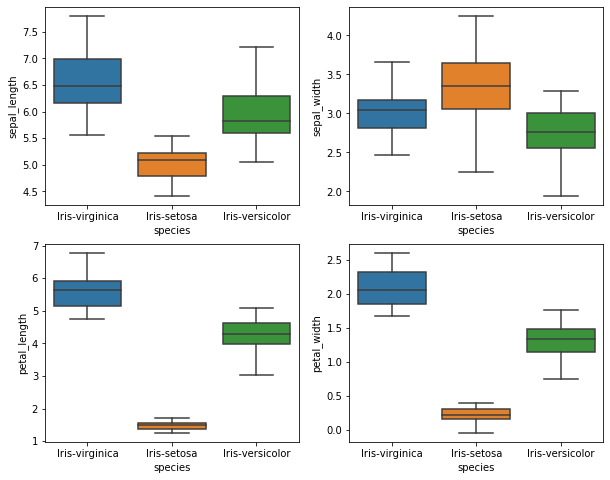

In [58]:
plt.figure(figsize=(10, 8))
for column_index, column in enumerate(iris_data.columns):
    if column == 'species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.boxplot(x='species', y=column, data=iris_data)

In [9]:
def outlier_detect(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower, upper

In [10]:
Vig = iris_data[iris_data.species == 'Iris-virginica']
lower, upper = outlier_detect(Vig.sepal_width)
Vig = Vig[(Vig.sepal_width>=lower) & (Vig.sepal_width<=upper)]

In [11]:
Set = iris_data[iris_data.species == 'Iris-setosa']
lower, upper = outlier_detect(Set.petal_length)
Set = Set[(Set.petal_length>=lower) & (Set.petal_length<=upper)]

In [12]:
lower, upper = outlier_detect(Set.petal_width)
Set = Set[(Set.petal_width>=lower) & (Set.petal_width<=upper)]

In [13]:
Ver = iris_data[iris_data.species == 'Iris-versicolor']

In [14]:
iris_data = pd.concat([Vig, Set, Ver])

In [15]:
len(iris_data)

94

11 outliers were removed.

### CM5. Data Clearning
#### Missing Value

In [16]:
iris_data.isna().sum()

sepal_length    0
sepal_width     3
petal_length    5
petal_width     0
species         0
dtype: int64

8 missing values were found, we will impute these missing values with the attribute mean values of their own species. 

In [17]:
Vig = iris_data[iris_data.species == 'Iris-virginica']
Set = iris_data[iris_data.species == 'Iris-setosa']
Ver = iris_data[iris_data.species == 'Iris-versicolor']

In [18]:
Vig[Vig.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
37,6.271780,2.521065,NaN,1.896626,Iris-virginica
65,6.235536,3.425253,NaN,2.423053,Iris-virginica
85,5.911822,2.560512,NaN,1.766513,Iris-virginica


In [19]:
Vig = Vig.fillna({'petal_length':Vig.petal_length.mean()})

In [20]:
Set[Set.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.205868,NaN,1.675654,0.112269,Iris-setosa


In [21]:
Set = Set.fillna({'sepal_width':Set.sepal_width.mean()})

In [22]:
Ver[Ver.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.847160,2.743619,NaN,0.748681,Iris-versicolor
50,5.817283,2.633800,NaN,1.141347,Iris-versicolor
54,6.265590,NaN,4.701306,1.290187,Iris-versicolor
64,6.340344,NaN,4.302989,1.331797,Iris-versicolor


In [23]:
Ver.sepal_width = Ver.sepal_width.fillna(Ver.sepal_width.mean())
Ver.petal_length = Ver.petal_length.fillna(Ver.petal_length.mean())

In [24]:
iris_data = pd.concat([Vig, Set, Ver])

In [25]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

8 missing values were imputed with the attribute means of their own species of iris.

#### Smoothing

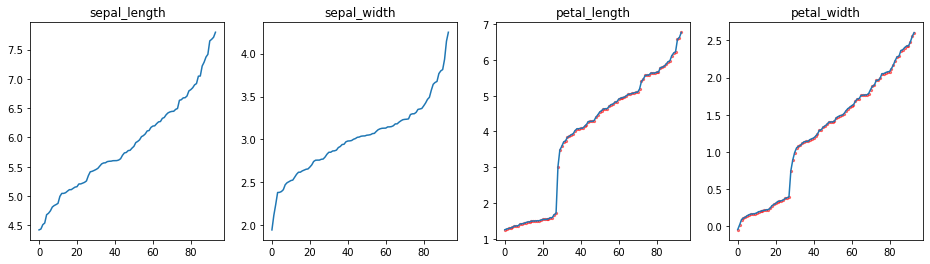

In [188]:
fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.plot(pd.Series(range(94)),iris_data.sepal_length.sort_values())
plt.title('sepal_length')

plt.subplot(1, 4, 2)
plt.plot(pd.Series(range(94)),iris_data.sepal_width.sort_values())
plt.title('sepal_width')

plt.subplot(1, 4, 3)
plt.scatter(pd.Series(range(94)),iris_data.petal_length.sort_values(), c='r', s=5, alpha=0.5)
plt.plot(pd.Series(range(94)),iris_data.petal_length.sort_values())
plt.title('petal_length')

plt.subplot(1, 4, 4)
plt.scatter(pd.Series(range(94)),iris_data.petal_width.sort_values(), c='r', s=5, alpha=0.5)
plt.plot(pd.Series(range(94)),iris_data.petal_width.sort_values())
plt.title('petal_width')

plt.show()

From the line charts we can see that the features don't show obvious fluctuations, the line charts are quite smooth already, so we don't need to use smoothing techniques to remove noise. 

Even though in petal_length, there is a dramatic increase, but it is only caused by one single data point, we don't have to smooth the whole set.

In [177]:
# Remove noise
# from scipy.signal import savgol_filter

# fig = plt.figure(figsize=(4, 4))
# plt.plot(pd.Series(range(94)),iris_data.petal_length.sort_values(),color='red')
# plt.plot(pd.Series(range(94)), pd.Series(savgol_filter(iris_data.petal_length,7,2)).sort_values())
# plt.show()

## Q2
### CM6. Basic Model

In [97]:
iris = iris_data

#### Dividing

In [102]:
from sklearn import model_selection

In [122]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

X_train, X_test_val, y_train, y_test_val = model_selection.train_test_split(X, y, train_size=0.6, random_state=275)
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test_val, y_test_val, train_size=0.5, random_state=275)

In [123]:
print(len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val))
# train, test, validation: 60%, 20%, 20%

56 19 19 56 19 19


#### Training with default parameters

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [125]:
model_def = KNeighborsClassifier()
model_def.fit(X_train, y_train)

y_pred = model_def.predict(X_test)
acc_def = metrics.accuracy_score(y_test, y_pred).round(2)
print(acc_def)

0.95


#### Finding the best parameter (k)

In [126]:
import matplotlib.pyplot as plt

In [127]:
k_list = [1,5,10,15,20,25,30,35] 
acc_list = []

for k in k_list:

    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train) # fit the model using the train set
    y_pred = model.predict(X_val) # test the model with the validation set
    acc = sklearn.metrics.accuracy_score(y_val, y_pred)
    acc_list.append(acc)

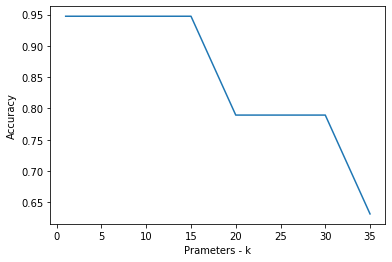

In [128]:
plt.plot(k_list, acc_list)
plt.ylabel('Accuracy')
plt.xlabel('Prameters - k')
plt.show()

In [113]:
print(pd.DataFrame(data={'Accuracy':acc_list, 'Parameters-k':k_list}))

   Accuracy  Parameters-k
0  0.947368             1
1  0.947368             5
2  0.947368            10
3  0.947368            15
4  0.789474            20
5  0.789474            25
6  0.789474            30
7  0.631579            35


The smaller values for k may lead to the overfitting problem. Large values for k also may lead to underfitting. 

Now we have multiple parameters with the exactly same accuracies, we chose k=5 as our "best parameter" to reduce the risk of underfitting and overfitting.

### CM7. Improving Performance

In [225]:
model_5 = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test) 

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print(sklearn.metrics.classification_report(y_test, y_pred))

Accuracy: 0.9474
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.67      1.00      0.80         2

       accuracy                           0.95        19
      macro avg       0.89      0.96      0.91        19
   weighted avg       0.96      0.95      0.95        19



In [227]:
print("AUC score:", metrics.roc_auc_score(pd.get_dummies(y_test),pd.get_dummies(y_pred)).round(2))

AUC score: 0.97


#### Normalization

There are different methods to normalize data, we will be comparing "Standard Scailing", "MinMax", "MaxAbs" and regular "Normalization".

In [152]:
from sklearn import preprocessing

#### Weighted KNN

We will be comparing the performance of Weighted KNN with weighting shceme being manhatten or eculidean (= default)

We will be comparing the combination of different normalization methods, weighting schema and also k, together, on validation set, to reach the best performance for classfication.

In [235]:
def knn(X_train, y_train, X_val, y_val, k, ws):
    model = KNeighborsClassifier(k, weights='distance', p=ws)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) 

    acc = metrics.accuracy_score(y_val, y_pred).round(2)
    return acc

In [272]:
def comb(X_train, y_train, X_val, y_val, norm_method):

    ws_list = [1,2]
    acc_list =[]
    k_new = []
    ws_new=[]
    
    for k in k_list:
        for ws in ws_list:
            acc = knn(X_train, y_train, X_val, y_val, k, ws)
            acc_list.append(acc)
            k_new.append(k)
            ws_new.append(ws)

    print("Normaization Method is:", norm_method)
    
    scorecard = pd.DataFrame(data={'Accuracy':acc_list, 'Parameters-k':k_new, 'Weighting Schema':ws_new})
    
    print(scorecard)    

In [273]:
# StandardScaler

Scaler = preprocessing.StandardScaler()
Scaler.fit(X_train)

X_scale_val = Scaler.transform(X_val)
X_scale_train = Scaler.transform(X_train)

comb(X_scale_train, y_train, X_scale_val, y_val, 'StandardScaling')

Normaization Method is: StandardScaling
    Accuracy  Parameters-k  Weighting Schema
0       0.95             1                 1
1       0.84             1                 2
2       0.95             5                 1
3       1.00             5                 2
4       1.00            10                 1
5       1.00            10                 2
6       1.00            15                 1
7       0.89            15                 2
8       0.89            20                 1
9       0.89            20                 2
10      0.89            25                 1
11      0.79            25                 2
12      0.89            30                 1
13      0.84            30                 2
14      0.89            35                 1
15      0.79            35                 2


In [274]:
# MinMaxScaler

Scaler = preprocessing.MinMaxScaler()
Scaler.fit(X_train)

X_scale_val = Scaler.transform(X_val)
X_scale_train = Scaler.transform(X_train)

comb(X_scale_train, y_train, X_scale_val, y_val, 'MinMaxScaling')

Normaization Method is: MinMaxScaling
    Accuracy  Parameters-k  Weighting Schema
0       0.95             1                 1
1       0.95             1                 2
2       1.00             5                 1
3       1.00             5                 2
4       1.00            10                 1
5       1.00            10                 2
6       1.00            15                 1
7       1.00            15                 2
8       0.95            20                 1
9       1.00            20                 2
10      0.95            25                 1
11      0.89            25                 2
12      0.95            30                 1
13      0.95            30                 2
14      0.95            35                 1
15      0.95            35                 2


In [275]:
# MaxAbsScaler

Scaler = preprocessing.MaxAbsScaler()
Scaler.fit(X_train)

X_scale_val = Scaler.transform(X_val)
X_scale_train = Scaler.transform(X_train)

comb(X_scale_train, y_train, X_scale_val, y_val, 'MaxAbsScaling')

Normaization Method is: MaxAbsScaling
    Accuracy  Parameters-k  Weighting Schema
0       0.95             1                 1
1       0.95             1                 2
2       0.95             5                 1
3       0.95             5                 2
4       1.00            10                 1
5       1.00            10                 2
6       1.00            15                 1
7       1.00            15                 2
8       0.95            20                 1
9       1.00            20                 2
10      1.00            25                 1
11      0.95            25                 2
12      0.95            30                 1
13      1.00            30                 2
14      1.00            35                 1
15      1.00            35                 2


In [276]:
# Normalizer

Scaler = preprocessing.Normalizer()
Scaler.fit(X_train)

X_scale_val = Scaler.transform(X_val)
X_scale_train = Scaler.transform(X_train)

comb(X_scale_train, y_train, X_scale_val, y_val, 'Normalizing')

Normaization Method is: Normalizing
    Accuracy  Parameters-k  Weighting Schema
0       0.89             1                 1
1       0.95             1                 2
2       0.95             5                 1
3       0.95             5                 2
4       0.95            10                 1
5       0.95            10                 2
6       0.95            15                 1
7       0.95            15                 2
8       0.95            20                 1
9       0.95            20                 2
10      0.95            25                 1
11      0.95            25                 2
12      0.95            30                 1
13      0.95            30                 2
14      0.95            35                 1
15      0.95            35                 2


Which combination to use?

Many combinations reached the best accuracy (100%) on validation set, shown as above. 

To reduce the risk of overfitting and underfitting, we don't want the model to be too complex or too simple, so we chose k = 10 and weighting schema = Euclidean as the best model.

Standard scaling and MaxAbs scaling had the same performance on validation, we chose standard scaling to keep it simple-to-control. 

#### Performance on test set

In [308]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(X_train)

X_scale_test = Scaler.transform(X_test)
X_scale_train = Scaler.transform(X_train)

In [309]:
model = KNeighborsClassifier(10, weights='distance', p=2)
model.fit(X_scale_train, y_train)
y_pred = model.predict(X_scale_test)

acc = metrics.accuracy_score(y_test, y_pred).round(2)
print('Accuracy:', acc)

Accuracy: 0.95


In [310]:
print(sklearn.metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.67      1.00      0.80         2

       accuracy                           0.95        19
      macro avg       0.89      0.96      0.91        19
   weighted avg       0.96      0.95      0.95        19



In [311]:
print("AUC score:", metrics.roc_auc_score(pd.get_dummies(y_test),pd.get_dummies(y_pred)).round(2))

AUC score: 0.97


### CM8. Analysis

#### Why to split the dataset into train, validation and test sets?

To reduce bias when we do prediction/estimcation.

The training set is applied to train or fit the model. For example, the training set can be used to find the optimal weights, or coefficients.

The validation set is used for unbiased model evaluation during hyperparameter tuning. 

The test set is needed for an unbiased evaluation of the final model. But we can't use it for fitting or validation since test dataset is not avaliable in practices.

#### Why use validation set instead of test set to find best paramters?

In industry, we can't get test datasets, we can only tune parameters on the validation set which was divided from our available training data. 

#### What  was  the  effect  of  changing k for  KNN.  


#### Accuracy always chages the same way with k? Why can this happen?